In [ ]:
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer, wordnet
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm, naive_bayes
from sklearn.metrics import accuracy_score

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stopwords = stopwords.words('english')
data = pd.read_csv('/disaster_response_messages_training.csv').head(10000)

In [5]:
# Checking for inappropriate values
index = data[data['related'].isin([1, 0]) == False].index
data.drop(index=index, inplace=True)

In [6]:
# Function to find the type of word
lemattizer_dict = {'V': wordnet.wordnet.VERB,
                   'J': wordnet.wordnet.ADJ,
                   'R': wordnet.wordnet.ADV}
def find_type(string):
  return lemattizer_dict.get(string, wordnet.wordnet.NOUN)


In [7]:
# Function to lemitize
def lemattize(message):
  lemattizer = nltk.WordNetLemmatizer()
  return [lemattizer.lemmatize(token, find_type(typ[0])) for (token, typ) in nltk.pos_tag(nltk.word_tokenize(message)) 
    if (token.isalpha() and token not in stopwords)]

In [8]:
# Function to convert strings to useful format
words = []
def convert_string(messages):
  temp = []
  for message in messages:
    result = lemattize(message)
    words.extend(result)
    temp.append(str(result))
  return temp

In [9]:
# Creating train and test data
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['related'], test_size=0.3)
x_train = convert_string(x_train)
x_test = convert_string(x_test)

In [10]:
# Using term frquency inverse document (TFIDF)
vectorizer = TfidfVectorizer()
vectorizer.fit(words)
x_train_vc = vectorizer.transform(x_train)
x_test_vc = vectorizer.transform(x_test)

In [11]:
# Reducing the matrix for plotting
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

embeddings = PCA(n_components=2)
Y = embeddings.fit_transform(x_train_vc.todense())

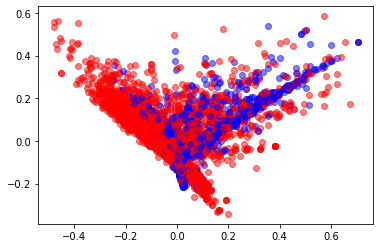

In [12]:
# Plotting the data points
for num, i in enumerate(Y):
  if y_train.values[num] == 1:
    plt.scatter(i[0], i[1], color='r', alpha=0.5)
  else:
    plt.scatter(i[0], i[1], color='b', alpha=0.5)
plt.show()

In [13]:
# Creating the classifier
clf = svm.SVC(kernel='linear', gamma='auto', C=1).fit(x_train_vc, y_train)

In [14]:
x_test_dred = embeddings.fit_transform(x_test_vc.todense())
prediction = clf.predict(x_test_vc)

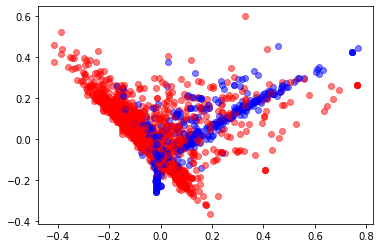

In [18]:
for num, i in enumerate(prediction):
  if i == 1:
    plt.scatter(x_test_dred[num][0], x_test_dred[num][1], alpha=0.5, color='r')
  else:
    plt.scatter(x_test_dred[num][0], x_test_dred[num][1], alpha=0.5, color='b')
plt.show()